In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [2]:
df_files = os.listdir('../../data/DataGithub/')
df_files

['code_etablissement.csv',
 'Effectifs_ecoles.csv',
 'fetes_chretiennes.csv',
 'fetes_juives.csv',
 'fetes_musulmanes.csv',
 'frequentation_cantines_v3.csv',
 'incidence RDD 3.csv',
 'incidence RDD 6.csv',
 'incidence RDD 7.csv',
 'Journees_de_greve.csv',
 'jours-feries-seuls.csv',
 'key_jours.xlsx',
 'Liste ETS_geo_AE12102020.xlsx',
 'menus_2011-2015.csv',
 'menus_2016-2019.csv',
 'missing_strikes.xlsx',
 'mouvements-sociaux-depuis-2002.csv',
 'mouvements-sociaux-depuis-2002.json',
 'orga_des_etablissements.xlsx',
 'ramadan.csv',
 'vacances_Nantes_2011-2019.csv']

In [3]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df['datetime']= df['Date'].apply( lambda string1 : datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['datetime'].apply( lambda date1 : date1.weekday())
df['isoweek']= df['datetime'].apply( lambda date1 : date1.isocalendar().week)
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36


In [27]:
df_effectifs=pd.read_csv('../../data/SiteNantes/CSV/244400404_effectifs-eleves-ecoles-publiques-maternelles-elementaires-nantes.csv', sep=';')
# df_effectifs['datetime']= df_effectifs['Date'].apply( lambda string1 : datetime.datetime.strptime(string1,"%Y-%m-%d")) 
# df_effectifs=df_effectifs['datetime'].unique()

In [29]:
df_effectifs.head()

,Ecole,Année scolaire,Effectif,Début année scolaire,Début année scolaire.1
0,AGENETS ELEMENTAIRE,2021-2022,250,2020-09-01,2021-10-01
1,ALAIN FOURNIER MATERNELLE,2021-2022,131,2020-09-01,2021-10-01
2,BEAUJOIRE MATERNELLE,2021-2022,99,2020-09-01,2021-10-01
3,"CAMILLE CLAUDEL ""bilingue breton""",2021-2022,22,2020-09-01,2021-10-01
4,CAMILLE CLAUDEL MATERNELLE,2021-2022,101,2020-09-01,2021-10-01


In [30]:
df_effectifs.shape

(1385, 5)

In [38]:
df_effectifs.keys()

Index(['Ecole', 'Année scolaire', 'Effectif', 'Début année scolaire',
       'Début année scolaire.1', 'An'],
      dtype='object')

In [32]:
df_effectifs['An']=df_effectifs['Année scolaire'].apply(lambda string1 : int(string1[0:4]))
df_effectifs.head()

,Ecole,Année scolaire,Effectif,Début année scolaire,Début année scolaire.1,An
0,AGENETS ELEMENTAIRE,2021-2022,250,2020-09-01,2021-10-01,2021
1,ALAIN FOURNIER MATERNELLE,2021-2022,131,2020-09-01,2021-10-01,2021
2,BEAUJOIRE MATERNELLE,2021-2022,99,2020-09-01,2021-10-01,2021
3,"CAMILLE CLAUDEL ""bilingue breton""",2021-2022,22,2020-09-01,2021-10-01,2021
4,CAMILLE CLAUDEL MATERNELLE,2021-2022,101,2020-09-01,2021-10-01,2021


In [56]:
df_effectifs[df_effectifs['An']==2021][['Ecole','Effectif']].groupby(['Ecole']).count().describe()

,Effectif
count,117.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [58]:
df_effectifs[df_effectifs['An']==2021][['Ecole','Effectif']].groupby(['Ecole']).median().describe()

,Effectif
count,117.000000
mean,170.940171
std,74.929195
min,22.000000
25%,119.000000
50%,154.000000
75%,208.000000
max,390.000000


In [79]:
df_eff1=df_effectifs[df_effectifs['An']==2021][['Ecole','Effectif']].groupby(['Ecole']).median().sort_values(by='Effectif')
df_eff1=pd.DataFrame(df_eff1).reset_index()
df_eff1

,Ecole,Effectif
0,"CAMILLE CLAUDEL ""bilingue breton""",22.0
1,BARBERIE MATERNELLE,47.0
2,GEORGES LAFONT MATERNELLE,59.0
3,COTE D'OR MATERNELLE,61.0
4,FREDUREAU MATERNELLE,67.0
...,...,...
112,LEDRU ROLLIN ELEMENTAIRE,352.0
113,JACQUES TATI PRIMAIRE,353.0
114,MUTUALITE ELEMENTAIRE,361.0
115,LONGCHAMP PRIMAIRE,369.0


In [61]:
df_effectifs[df_effectifs['An']==2020][['Ecole','Effectif']].groupby(['Ecole']).median().sort_values(by='Effectif')

,Effectif
Ecole,
"CAMILLE CLAUDEL ""bilingue breton""",14.0
JOSEPHINE BAKER,51.0
COTE D'OR MATERNELLE,64.0
BARBERIE MATERNELLE,65.0
"BATIGNOLLES bilingue ""Français/Breton""",68.0
...,...
JACQUES TATI PRIMAIRE,348.0
LEDRU ROLLIN ELEMENTAIRE,357.0
LONGCHAMP PRIMAIRE,385.0


In [95]:
df_effectifs[df_effectifs['An']==2020][['Ecole','Effectif']].groupby(['Ecole']).median().sort_values(by='Ecole').head(30)


,Effectif
Ecole,
AGENETS ELEMENTAIRE,232.0
AGENETS MATERNELLE,146.0
AIME CESAIRE PRIMAIRE,320.0
ALAIN FOURNIER ELEMENTAIRE,180.0
ALAIN FOURNIER MATERNELLE,136.0
ALPHONSE BRAUD PRIMAIRE,171.0
AMPERE PRIMAIRE,304.0
ANATOLE DE MONZIE ELEMENTAIRE,151.0
ANDRE LERMITE ELEMENTAIRE,226.0


In [147]:
isPrim = lambda string1 : (string1[-9:]==' PRIMAIRE')
isElem = lambda string1 : (string1[-12:]==' ELEMENTAIRE')
isMat = lambda string1 : (string1[-11:]==' MATERNELLE')

In [164]:
toPrim = lambda string1 : string1[:-9]
toElem = lambda string1 : string1[:-10]
toMat = lambda string1 : string1[:-9]

In [148]:
isPrim(df_eff1['Ecole'][115])

True

In [165]:
toPrim(df_eff1['Ecole'][115])

'LONGCHAMP'

In [149]:
isElem(df_eff1['Ecole'][114])

True

In [162]:
toElem(df_eff1['Ecole'][114])

'MUTUALITE E'

In [150]:
isMat(df_eff1['Ecole'][2])

True

In [163]:
toMat(df_eff1['Ecole'][2])

'GEORGES LAFONT M'

In [153]:
df_eff1['Ecole'][2][:-9]

'GEORGES LAFONT M'

In [168]:
df_eff1['Ecole'] = df_eff1['Ecole'].apply(lambda string1 : toMat(string1) if isMat(string1) else string1)

In [170]:
df_eff1['Ecole'] = df_eff1['Ecole'].apply(lambda string1 : toElem(string1) if isElem(string1) else string1)

In [172]:
df_eff1['Ecole'] = df_eff1['Ecole'].apply(lambda string1 : toPrim(string1) if isPrim(string1) else string1)

In [96]:
df_eff2=df[df['An']==2022][['Nom du site','Réel']].groupby(['Nom du site']).median()
df_eff2=pd.DataFrame(df_eff2).reset_index()
df_eff2.rename(columns={'Nom du site':'Ecole'}, inplace=True)
df_eff2.sort_values(by='Ecole').head(30)

,Ecole,Réel
0,AGENETS,341.0
1,AIME CESAIRE,230.0
2,ALAIN FOURNIER E,171.0
3,ALPHONSE BRAUD,142.0
4,AMPERE,281.0
5,ANATOLE DE MONZIE,129.5
6,ANDRE LERMITE/LAMORICIERE,296.0
7,ANGE GUEPIN,97.5
8,BARBERIE,76.0
9,BATIGNOLLES,248.0


In [173]:
df_eff3=pd.merge(df_eff1,df_eff2, how='inner', on='Ecole')
df_eff3

,Ecole,Effectif,Réel
0,BOCCAGE M,69.0,69.0
1,CHENE D'ARON M,74.0,72.0
2,CHAUVINIERE M,88.0,59.0
3,STALINGRAD M,94.0,88.0
4,GASTON SERPETTE M,107.0,93.0
5,VILLA MARIA,107.0,110.5
6,GUSTAVE ROCH M,123.0,95.0
7,CHENE D'ARON E,130.0,134.5
8,MARSAUDERIES M,132.0,153.0
9,BOCCAGE E,135.0,124.5


In [ ]:
df_eff3=pd.merge(df_eff1,df_eff2, how='inner', on='Ecole')
df_eff3

,Ecole,Effectif,Réel
0,BOCCAGE M,69.0,69.0
1,CHENE D'ARON M,74.0,72.0
2,CHAUVINIERE M,88.0,59.0
3,STALINGRAD M,94.0,88.0
4,GASTON SERPETTE M,107.0,93.0
5,VILLA MARIA,107.0,110.5
6,GUSTAVE ROCH M,123.0,95.0
7,CHENE D'ARON E,130.0,134.5
8,MARSAUDERIES M,132.0,153.0
9,BOCCAGE E,135.0,124.5


<AxesSubplot:xlabel='datelag'>

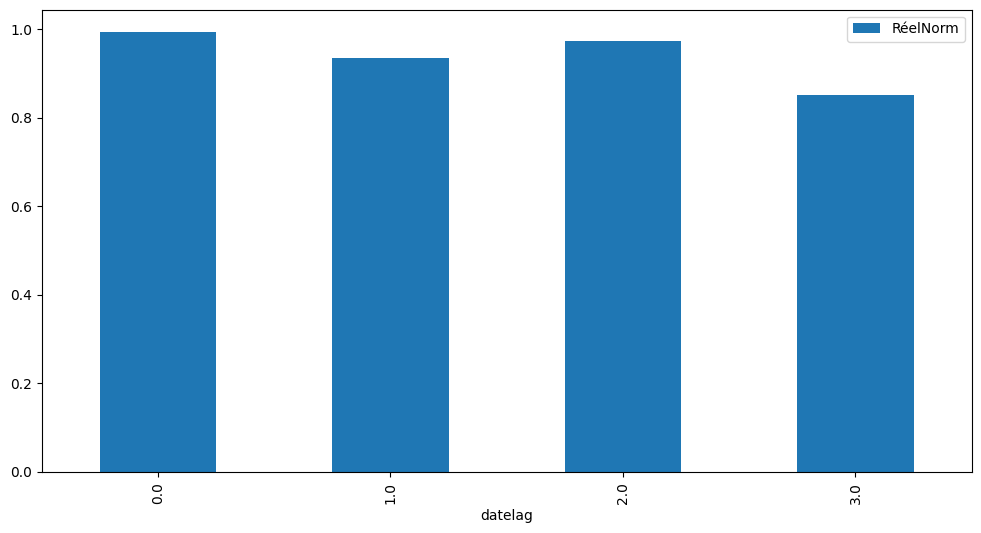

In [19]:
df[['datelag','RéelNorm']].groupby('datelag').mean().plot(kind='bar', figsize=(12,6))